# <h1><center>Equidade em Aprendizado de Máquina</center></h1>

## Renan Del Buono Brotto

## Introdução

As técnicas de Aprendizado de Máquina estão em rápida ascensão em diversas áreas, como processamento de linguagem natural  e reconhecimento de fala \cite{Kamath2019}, processamento de imagem \cite{Cipolla2013}, problemas de classificação \cite{Duda2000}, reconhecimento de padrões \cite{Bishop2006} entre outras. 

O objetivo central do Aprendizado de Máquina é projetar modelos computacionais capazes de aprender uma determinada tarefa a partir de dados, sem que exista uma programação específica para a tarefa em questão \cite{Samuel1959}. Para tanto, apresentamos um conjunto de dados disponíveis, denominado conjunto de treinamento, a fim de que o modelo capture as informações relevantes para o problema investigado \cite{Hastie2009}. 

Além de ter um bom desempenho, segundo uma métrica adequada, frente aos dados de treinamento, o modelo ajustado deve ser capaz de apresentar um bom desempenho frente a dados desconhecidos, pertencentes a um conjunto normalmente denominado conjunto de teste. Este segundo requisito configura a capacidade de generalização do modelo \cite{Bishop2006}, \cite{haykin-rn}.

Contudo, durante o processo de aprendizagem, o modelo pode capturar informações irrelevantes, ou mesmo indesejadas, para a tarefa considerada, configurando uma situação de sobreajuste \cite{haykin-rn}. Neste tipo de situação, temos um bom desempenho frente ao conjunto de treinamento, mas o modelo se comporta mal quando avaliado frente a novos dados \cite{Bishop2006}. Dentre as informações indesejadas aprendidas, podemos citar ruído presente sobre os dados \cite{Bishop2006} ou mesmo algum tipo de viés apresentado nos dados de treinamento.

O viés contido nos dados de treinamento desempenha um papel fundamental quando aplicamos os modelos de Aprendizado de Máquina em tarefas com impacto social direto, tais como concessão de crédito (colocar ref.), aprovação em universidades (colocar ref.) ou a concessão de liberdade condicional (colocar ref.). Neste tipo de problema as técnicas clássicas de aprendizado incorporam as tendências observadas nos dados, o que pode dar origem a atributos discriminativos, como por exemplo o gênero em um problema de concessão de crédito ou a etnia em um problema de concessão de liberdade condicional. Uma vez aprendida esta característica, o modelo ajustado passa a produzir resultados que podem contribuir ainda mais com a disparidade do problema \cite{ONeil2016}.




# Descrição do Dataset


Conjunto de dados: Adult Data Set (Disponível em: http://archive.ics.uci.edu/ml/datasets/adult e de domínio público). Este conjunto de dados é formado por 14 atributos, tanto categóricos quanto atributos numéricos, anonimizado. Dentre estes atributos temos idade, tipo de trabalho, gênero, etnia, estado civil, horas trabalhadas por semana entre outros. Para cada indivíduo do conjunto de dados, temos um rótulo, indicando uma renda anual superior (igual) a $50 k ou inferior a este limiar.

Como muitos dos atribuitos são categóricos, vamos convertê-los para atributos numéricos.


In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import sklearn as sk
import seaborn as sns
import math
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
def add_header(header, file, output_name):
    #function to add a header to a csv file
    import csv
    
    with open(file, 'rt') as input_file:
        reader = csv.reader(input_file)
        data_list = list(reader)
    
    with open(output_name, 'wt', newline ='') as output_file:
        writer = csv.writer(output_file, delimiter=',')
        writer.writerow(i for i in header)
        for j in data_list:
            writer.writerow(j)      

In [3]:
# Adicionando cabecalho aos dados

header = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital Status", "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per Week", "Native Country", "Annual Gain"]
file = "../data/adult-data.csv"
output_name = "../data/adultdataset.csv"
add_header(header, file, output_name)

In [4]:
#Abrindo o conjunto de dados
adult_data = pd.read_csv("../data/adultdataset.csv", sep=',')

#Selecao de atributos
adult_data = adult_data.drop(columns=['Fnlwgt'])

adult_data.head()


,Age,Workclass,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Conversão dos atributos categóricos em atributos numéricos
le = preprocessing.LabelEncoder()
le.fit(adult_data['Annual Gain'])
le.classes_
adult_data['Annual Gain'] = le.transform(adult_data['Annual Gain'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Workclass'])
le.classes_
adult_data['Workclass'] = le.transform(adult_data['Workclass'])
adult_data.head(10)

le = preprocessing.LabelEncoder()
le.fit(adult_data['Education'])
le.classes_
adult_data['Education'] = le.transform(adult_data['Education'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Marital Status'])
le.classes_
adult_data['Marital Status'] = le.transform(adult_data['Marital Status'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Occupation'])
le.classes_
adult_data['Occupation'] = le.transform(adult_data['Occupation'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Relationship'])
le.classes_
adult_data['Relationship'] = le.transform(adult_data['Relationship'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Race'])
le.classes_
adult_data['Race'] = le.transform(adult_data['Race'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Sex'])
le.classes_
adult_data['Sex'] = le.transform(adult_data['Sex'])

le = preprocessing.LabelEncoder()
le.fit(adult_data['Native Country'])
le.classes_
adult_data['Native Country'] = le.transform(adult_data['Native Country'])

adult_data.head()


,Age,Workclass,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0


Contudo, existe uma inequidade entre a distribuição de indivíduos de "Alta Renda (1)" e "Baixa Renda (0)" entre as populações masculina e feminina, bem como entre a população branca e não-branca. 


## População Completa

Vamos agora, visualizar um pouco os dados. Inicialmente, vamos analisar a proporção de indivíduos com alta renda (>= 50K) na população completa.

Percentual de alta renda (populacao completa): 
 24.080955744602438 %


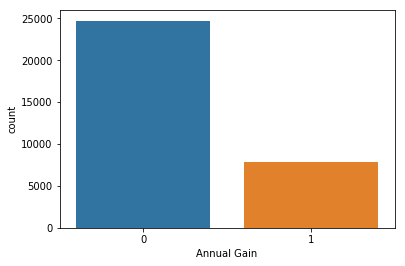

In [6]:
sns.countplot(adult_data['Annual Gain'])

adult_1 = sum(adult_data['Annual Gain']==1)

adult_0 = sum(adult_data['Annual Gain']==0)

ratio = adult_1/(adult_0 + adult_1)
print('Percentual de alta renda (populacao completa): \n', ratio*100, '%')

Vamos agora repetir a mesma análise entre as populações masculina e feminina.
## Análise das Populações Masculina e Feminina

Percentual de homens na população: 
 66.92054912318419 %
Percentual de mulheres na população: 
 33.07945087681583 %


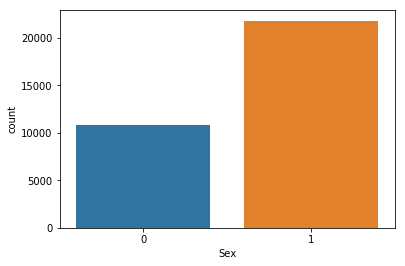

In [7]:
sns.countplot(adult_data['Sex'])

num_male = sum(adult_data['Sex']== 1)

num_female = sum(adult_data['Sex']== 0)

male_ratio = num_male/(num_male+num_female)
female_ratio = num_female/(num_male+num_female)

print('Percentual de homens na população: \n', male_ratio*100, '%')
print('Percentual de mulheres na população: \n', female_ratio*100, '%')

Do gráfico acima, podemos notar que existe um número consideravelmente de dados referentes a homens na população do que o número de dados associados. Em um paradigma tradicional de Aprendizado de Máquina, um número maior de padrões de entrada relacionado a homens será apresentado ao modelo, o que pode polarizar a tarefa de classificação.

In [8]:
# Populacao Feminina
is_female = adult_data.Sex == 0
is_female.head()
female_data = adult_data[is_female]
female_data.head()

,Age,Workclass,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,6,5,3,8,1,2,0,0,0,16,23,0
8,31,4,12,14,4,10,1,4,0,14084,0,50,39,1
12,23,4,9,13,4,1,3,4,0,0,0,30,39,0


In [9]:
#Populacao Masculina
is_male = adult_data.Sex == 1
is_male.head()
male_data = adult_data[is_male]
male_data.head()

,Age,Workclass,Education,Education-num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Annual Gain
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
7,52,6,11,9,2,4,0,4,1,0,0,45,39,1


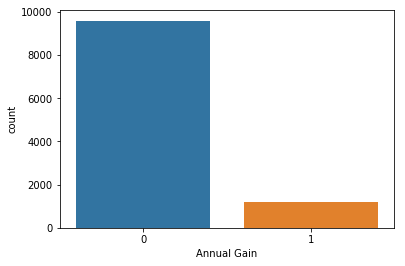

In [10]:
sns.countplot(female_data['Annual Gain'])

In [11]:
female_1 = sum(female_data['Annual Gain']==1)

female_0 = sum(female_data['Annual Gain']==0)

female_ratio_high = female_1/(female_0 + female_1)
print('Percentual de alta renda (populacao feminina): \n', female_ratio_high*100, '%')

Percentual de alta renda (populacao feminina): 
 10.946058861758425 %


Percebemos do resultado acima que o número de indivíduos na população feminina na classe "Alta Renda" é inferior ao percentual da população como um todo.

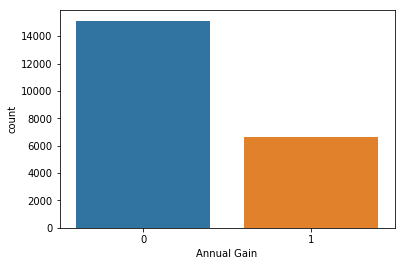

In [12]:
sns.countplot(male_data['Annual Gain'])

In [13]:
male_1 = sum(male_data['Annual Gain']==1)

male_0 = sum(male_data['Annual Gain']==0)

male_ratio_high = male_1/(male_0 + male_1)
print('Percentual de alta renda (populacao masculina): \n', male_ratio_high*100, '%')

Percentual de alta renda (populacao masculina): 
 30.573657641119777 %


Já para a população masculina, notamos um percentual superior de indivíduos com "Alta Renda", quando comparada com a população geral. Na sequência, vamos analisar como as classes "Alta Renda" e "Baixa Renda" se distribuem entre indivíduos brancos e não-brancos.

## Análise das Populações Branca e Não-Branca

Percentual de alta renda (populacao branca): 
 25.58599367270636 %


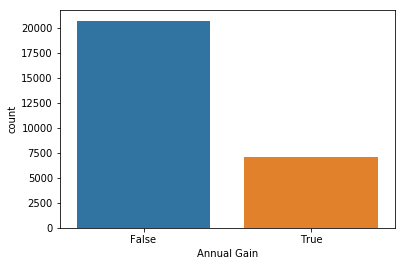

In [14]:
is_white = adult_data.Race == 4
white_data = adult_data[is_white]

sns.countplot(white_data['Annual Gain'] == 1)

white_1 = sum(white_data['Annual Gain']==1)
#print(white_1)

white_0 = sum(white_data['Annual Gain']==0)
#print(white_0)

white_ratio_high = white_1/(white_0 + white_1)
print('Percentual de alta renda (populacao branca): \n', white_ratio_high*100, '%')

Para o caso da população branca, notamos que o percentual de indivíduos classficados como "Alta Renda" está um pouco acima do valor correspondente à população geral.

Percentual de alta renda (populacao não-branca): 
 15.258166491043204 %


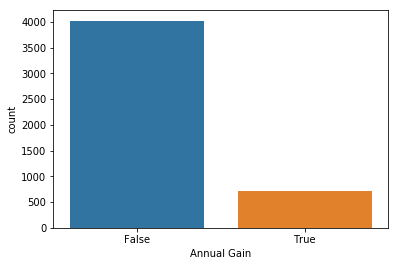

In [15]:
is_not_white = adult_data.Race != 4
not_white_data = adult_data[is_not_white]

sns.countplot(not_white_data['Annual Gain'] == 1)

not_white_1 = sum(not_white_data['Annual Gain']==1)

not_white_0 = sum(not_white_data['Annual Gain']==0)

not_white_ratio_high = not_white_1/(not_white_0 + not_white_1)
print('Percentual de alta renda (populacao não-branca): \n', not_white_ratio_high*100, '%')

Já para a população não-branca, notamos um percentual de "Alta Renda" inferior ao da população global.

# Metodologia 

Para a tarefa de classificação, empregaremos um classificador com regressão logística. Para os nossos propósitos aqui, adotaremos o atributo "Gênero" como atributo discriminatório. Ao todo, empregaremos 3 classificadores (todos treinados segundo o paradigma de regressão logística):

1) Classificador Tradicional: neste caso, faremos o treinamento sem nenhum tipo de ajuste sobre os dados.

2) Classificador com Descorrelação Linear: neste segundo caso, buscaremos descorrelacionar linearmente o atributo discriminatório das classes do problema ("Fairness Constraints: Mechanisms for Fair Classification", Zafar, _et al._, 2017).

3) Classificador com Descorrelação Não Linear: neste último caso, buscaremos a independência entre o atributo Gênero e as classe do problema, por meio da descorrelação não-linear.



In [16]:
dados_entrada = adult_data.values #converte dataframe para np array

#Separacao dos dados em treinamento e teste
percentual_teste = 0.3;
fim_treinamento = math.floor((1-percentual_teste)*dados_entrada.shape[0]);

dados_treino = dados_entrada[0:fim_treinamento+1, :];
dados_teste = dados_entrada[fim_treinamento+1:dados_entrada.shape[0], :]

entrada_treino = dados_treino[:, 0:dados_treino.shape[1]-1];
saida_treino = dados_treino[:, dados_treino.shape[1]-1];
saida_treino = np.reshape(saida_treino, (saida_treino.shape[0],1))

entrada_teste = dados_teste[:, 0:dados_teste.shape[1]-1];

saida_teste = dados_teste[:, dados_teste.shape[1]-1];
saida_teste = np.reshape(saida_teste, (saida_teste.shape[0],1))

In [17]:
MC = 100 #simulacoes de Monte Carlo

acuracia_clf1 = 0;

for i in range(0, MC):
    #Classificador 1
    clf1 = SGDClassifier(max_iter=1000, tol=1e-2)
    clf1.fit(entrada_treino, saida_treino)

    saida_pred_1 = clf1.predict(entrada_teste)
    saida_pred_1 = np.reshape(saida_pred_1, (saida_pred_1.shape[0],1))

    acuracia_clf1 = acuracia_clf1 + metrics.accuracy_score(saida_teste, saida_pred_1)

#print('Acurácia Classificador 1 [%]: ', 100*acuracia_clf1/MC)

Acurácia Classificador 1 [%]:  76.44891482391482


In [18]:
#Classificador 2
#Descorrelacao Linear via PCA

entrada_treino_clf2 = np.copy(entrada_treino);
aux = entrada_treino_clf2[:,8]
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_treino = np.concatenate((aux, saida_treino), axis=1);
pca = PCA(n_components=1);
genero_modificado_treino = pca.fit_transform(genero_modificado_treino)
entrada_treino_clf2[:,8] = genero_modificado_treino[:,0];

entrada_teste_clf2 = np.copy(entrada_teste);
aux = entrada_teste_clf2[:,8]
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_teste = np.concatenate((aux, saida_teste), axis=1);
pca = PCA(n_components=1);
genero_modificado_teste = pca.fit_transform(genero_modificado_teste)
entrada_teste_clf2[:,8] = genero_modificado_teste[:,0];

acuracia_clf2=0;

for i in range(0, MC):

    clf2 = SGDClassifier(max_iter=1000, tol=1e-2)
    clf2.fit(entrada_treino_clf2, saida_treino)

    saida_pred_2 = clf2.predict(entrada_teste_clf2)
    saida_pred_2 = np.reshape(saida_pred_2, (saida_pred_2.shape[0],1))

    acuracia_clf2 = acuracia_clf2 + metrics.accuracy_score(saida_teste, saida_pred_2)

#print('Acurácia Classificador 2 [%]: ', 100*acuracia_clf2/MC)


Acurácia Classificador 2 [%]:  76.35585585585582


In [19]:
#Classificador 3
#Independencia via PCA Não Linear

entrada_treino_clf3 = np.copy(entrada_treino);
aux = np.tanh(entrada_treino_clf3[:,8]) #funcao de nao linearidade
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_treino = np.concatenate((aux, saida_treino), axis=1);
pca = PCA(n_components=1);
genero_modificado_treino = pca.fit_transform(genero_modificado_treino)
entrada_treino_clf3[:,8] = genero_modificado_treino[:,0];

entrada_teste_clf3 = np.copy(entrada_teste);
aux = np.tanh(entrada_teste_clf2[:,8])
aux = np.reshape(aux, (aux.shape[0],1))
genero_modificado_teste = np.concatenate((aux, saida_teste), axis=1);
pca = PCA(n_components=1);
genero_modificado_teste = pca.fit_transform(genero_modificado_teste)
entrada_teste_clf3[:,8] = genero_modificado_teste[:,0];

acuracia_clf3=0

for i in range(0, MC):

    clf3 = SGDClassifier(max_iter=1000, tol=1e-2)
    clf3.fit(entrada_treino_clf2, saida_treino)

    saida_pred_3 = clf3.predict(entrada_teste_clf3)
    saida_pred_3 = np.reshape(saida_pred_3, (saida_pred_3.shape[0],1))

    acuracia_clf3 = metrics.accuracy_score(saida_teste, saida_pred_3)

#print('Acurácia Classificador 3 [%]: ', 100*acuracia_clf3/MC)


Acurácia Classificador 3 [%]:  0.6075962325962326


In [29]:
# Geracao da saida

saida_acuracua = np.array([['','Classificador 1','Classificador 2', 'Classificador 3'],
                ['Acurácia [%]',acuracia_clf1,acuracia_clf2, acuracia_clf3]])

acuracia_formatada = pd.DataFrame(data=saida_acuracia[1:,1:], index=saida_acuracia[1:,0], columns=saida_acuracia[0,1:])
acuracia_formatada

,Classificador 1,Classificador 2,Classificador 3
Acurácia [%],76.44891482391482,76.35585585585582,0.6075962325962326


In [66]:
#Calculo das taxas em cada uma das subpopulacoes

indice_masc = entrada_teste[:,8]==1
indice_fem = entrada_teste[:,8]==0

saida_pred_1_masc = saida_pred_1[indice_masc]
saida_pred_1_fem = saida_pred_1[indice_fem]
tam_populacao = saida_pred_1.shape[0]
total_masc_1 = sum(saida_pred_1_masc)
total_fem_1 = sum(saida_pred_1_fem)
taxa_masc_cl1 = total_masc_1/tam_populacao
taxa_masc_cl1 = 100*taxa_masc_cl1[0]
taxa_fem_cl1 = total_fem_1/tam_populacao
taxa_fem_cl1 = 100*taxa_fem_cl1[0]

saida_pred_2_masc = saida_pred_2[indice_masc]
saida_pred_2_fem = saida_pred_2[indice_fem]
total_masc_2 = sum(saida_pred_2_masc)
total_fem_2 = sum(saida_pred_2_fem)
taxa_masc_cl2 = total_masc_2/tam_populacao
taxa_masc_cl2 = 100*taxa_masc_cl2[0]
taxa_fem_cl2 = total_fem_2/tam_populacao
taxa_fem_cl2 = 100*taxa_fem_cl2[0]

saida_pred_3_masc = saida_pred_3[indice_masc]
saida_pred_3_fem = saida_pred_3[indice_fem]
total_masc_3 = sum(saida_pred_3_masc)
total_fem_3 = sum(saida_pred_3_fem)
taxa_masc_cl3 = total_masc_3/tam_populacao
taxa_masc_cl3 = 100*taxa_masc_cl3[0]
taxa_fem_cl3 = total_fem_3/tam_populacao
taxa_fem_cl3 = 100*taxa_fem_cl3[0]


saida_taxa = np.array([['','Classificador 1','Classificador 2', 'Classificador 3'],
                ['Pop. Masculina [%]',taxa_masc_cl1, taxa_masc_cl2, taxa_masc_cl3],
                ['Pop. Feminina [%]', taxa_fem_cl1,  taxa_fem_cl2,  taxa_fem_cl3]])

taxa_formatada = pd.DataFrame(data=saida_taxa[1:,1:], index=saida_taxa[1:,0], columns=saida_taxa[0,1:])
taxa_formatada


,Classificador 1,Classificador 2,Classificador 3
Pop. Masculina [%],28.57289107289107,24.06838656838657,33.81449631449631
Pop. Feminina [%],4.6580671580671575,5.61015561015561,10.36036036036036


# Workflow


![title](../fig/WorkflowIA369.png)